In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.rc('axes', labelsize=BIGGER_SIZE)   
plt.rc('axes', titlesize=MEDIUM_SIZE)   

def degtorad(deg):
    return(deg/180*np.pi)
def chisquared(func,xdata,ydata,parms):
    chisq=0
    for x in range(len(xdata)):
        chisq=chisq+(func(xdata,*parms)-ydata)**2
    return sum(chisq)

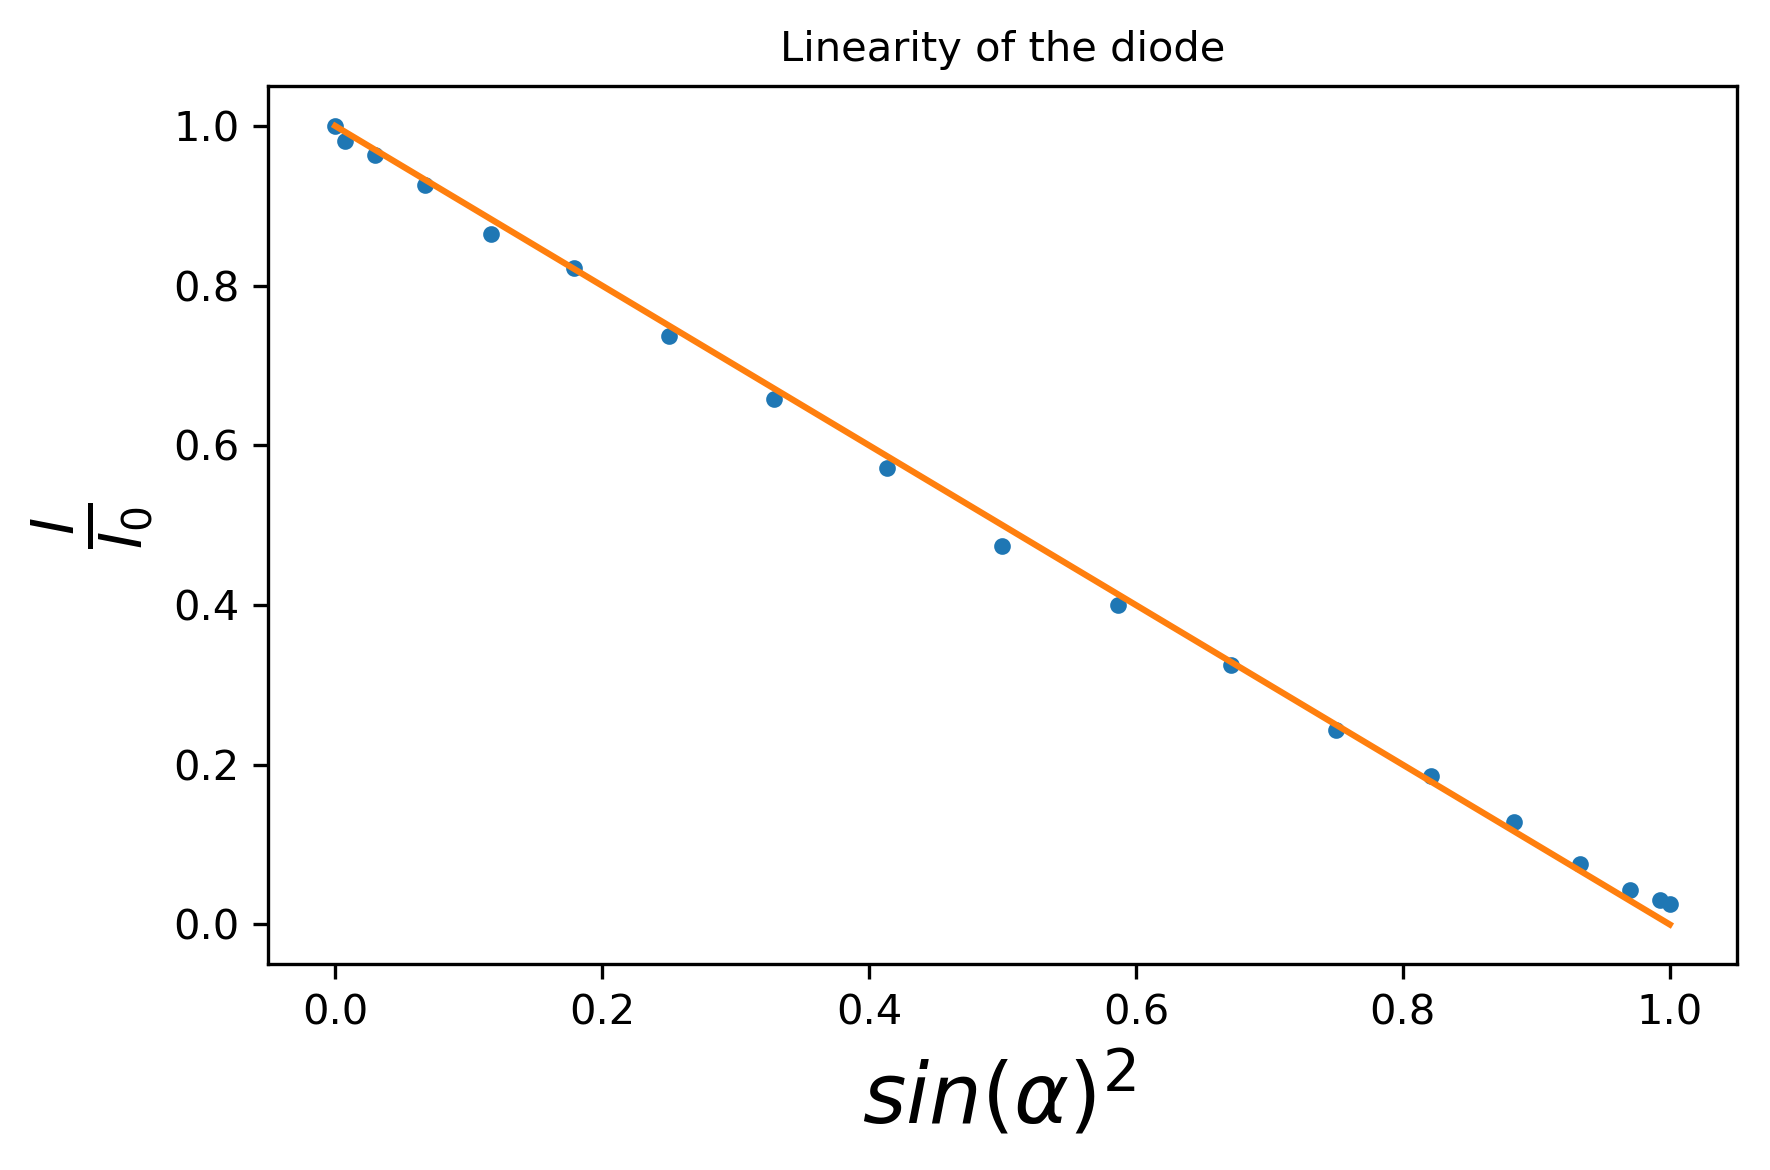

In [271]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data

angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots(dpi=300,)
ax.plot(np.sin(degtorad(angle))**2,intens,".")
mylin=np.linspace(0,1,1000)
ax.plot(mylin,1-mylin,label="m:-1 \nb=1")
ax.set_xlabel(r"$sin(\alpha)^2$ ")
ax.set_ylabel(r"$\frac{I}{I_0}$")
ax.set_title("Linearity of the diode")
plt.tight_layout()
fig.savefig("Plots/IntCalibration")

In [272]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):
    """Returns popt,pcov,relevantx,relevanty"""
    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b),maxfev=10000)
    return popt,pcov,tempx,tempy
def adjustLambda(lamb,m=0.98,b=23.25):
    return(b+lamb*m)
def wavelen_in_Energy(wavelen):
    wavelen=np.array(wavelen)
    wavelen=wavelen*1e-9
    E=c.h*c.speed_of_light/(wavelen*c.e)
    return(E)

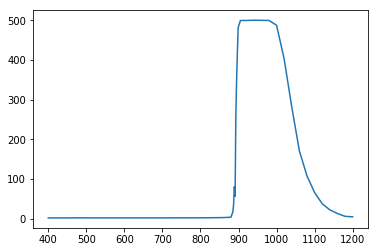

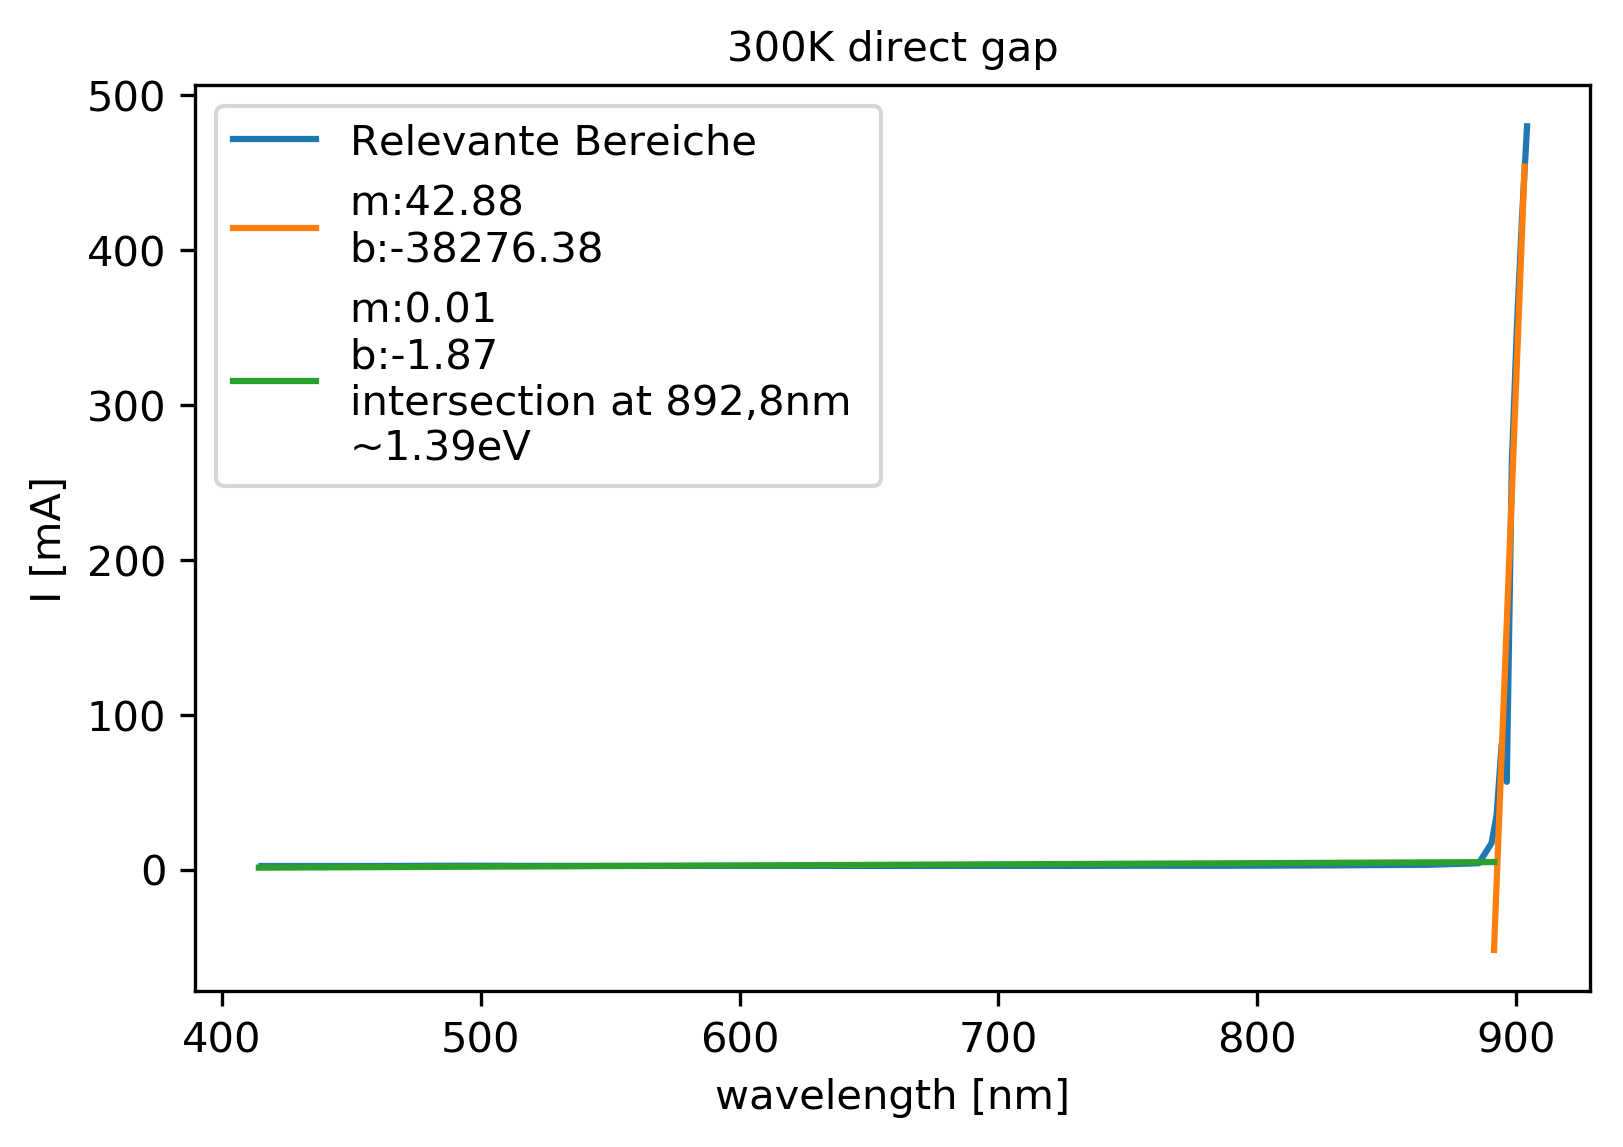

In [273]:
plt.rc('axes', labelsize=MEDIUM_SIZE)   
fig,ax=plt.subplots()
plotXY(ax,"Data/Links.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/Links.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f}".format(*popt))
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f} \nintersection at 892,8nm \n~{:.2f}eV".format(*popt,wavelen_in_Energy(892.8)))
ax.legend()
ax.set_title("300K direct gap")
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("I [mA]")
fig.savefig("Plots/300k direct gap")

In [274]:
def plotXY(ax,filename,skiprows,label):
    data=pd.read_table(filename,skiprows=skiprows)
    angle=np.array(data.values[:,0])
    intens=np.array(data.values[:,1])
 
    ax.plot(angle,intens,label=label)

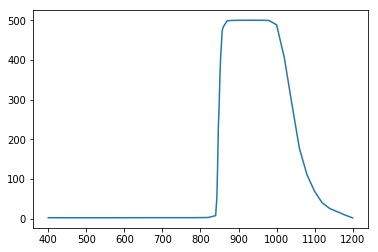

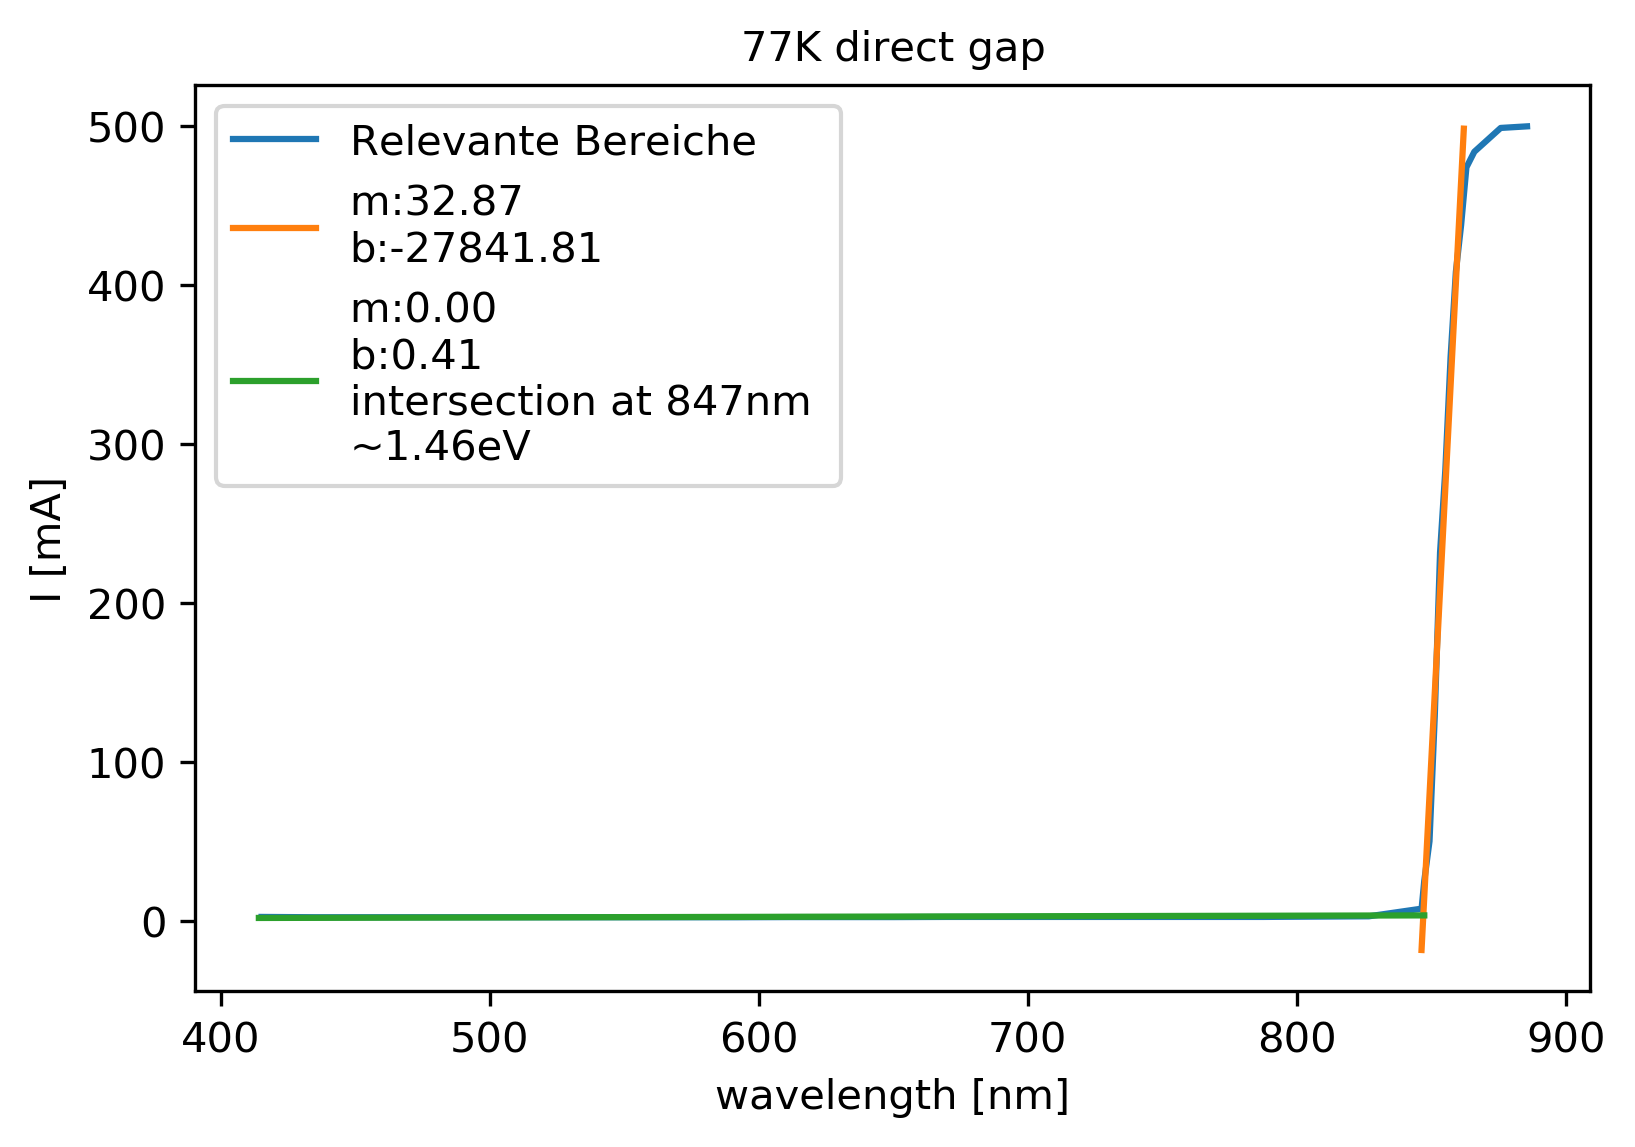

In [275]:
fig,ax=plt.subplots()
plotXY(ax,"Data/LinksN2.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/LinksN2.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f}".format(*popt))
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f} \nintersection at 847nm \n~{:.2f}eV".format(*popt,wavelen_in_Energy(847)))
ax.legend()
ax.set_title("77K direct gap")
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("I [mA]")
fig.savefig("Plots/77k direct gap")

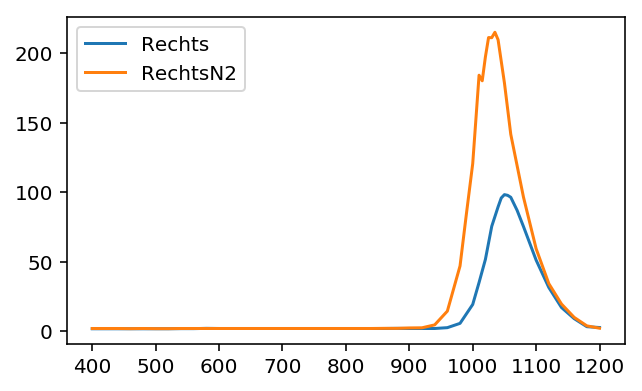

In [276]:
fig,ax=plt.subplots(dpi=144,figsize=(5,3))
plotXY(ax,"Data/Rechts.txt",2,"Rechts")
plotXY(ax,"Data/RechtsN2.txt",2,"RechtsN2")
#plotXY(ax,"Data/Links.txt",2,"Links")
#plotXY(ax,"Data/LinksN2.txt",2,"LinksN2")
#ax.semilogy()
ax.legend()

In [277]:
def indFit(wl,Eg,Ep,A,T=300):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

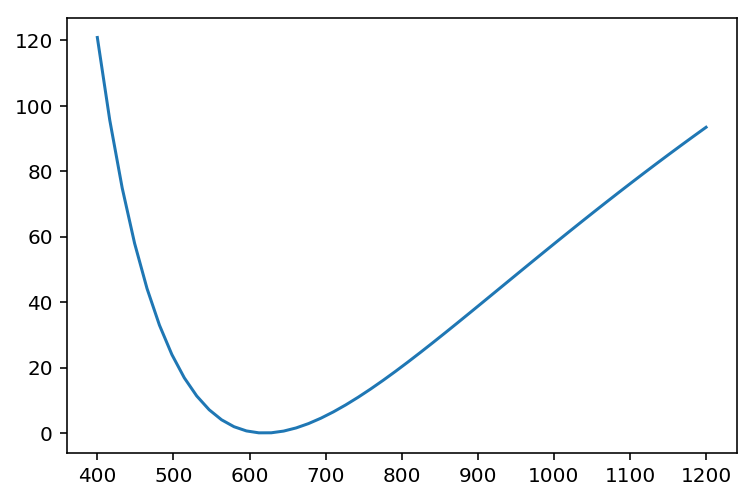

In [278]:
#popt,pcov=cf(ind Fit)

d=np.linspace(400,1200)
fig,ax=plt.subplots(dpi=144)
ax.plot(d,100* indFit(d, 1.7, 0.3,1))
#ax.set(yscale="log")

1 : [9.46382008e-01 2.24161852e-01 3.60311018e+02]
1e-05 1e-05
2 : [2.25389548e-01 9.45154311e-01 3.60311016e+02]
1e-05 1.000005
3 : [1.39815196e+04 1.39855048e+04 9.31787059e-10]
1e-05 2.0
4 : [  0.79981355   0.37073031 360.31101573]
1.000005 1e-05
5 : [1.11716152e+04 1.11738555e+04 1.45949854e-09]
1.000005 1.000005
6 : [1.47380398e+04 1.47419425e+04 8.38617661e-10]
1.000005 2.0
7 : [1.20663270e+04 1.20675202e+04 1.25142226e-09]
2.0 1e-05
8 : [1.40309302e+04 1.40368606e+04 9.25202370e-10]
2.0 1.000005
9 : [1.15090891e+04 1.15097829e+04 1.37536010e-09]
2.0 2.0


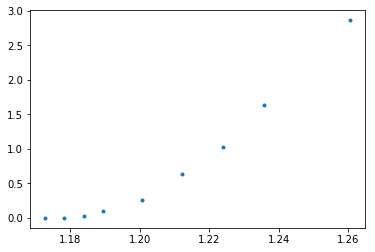

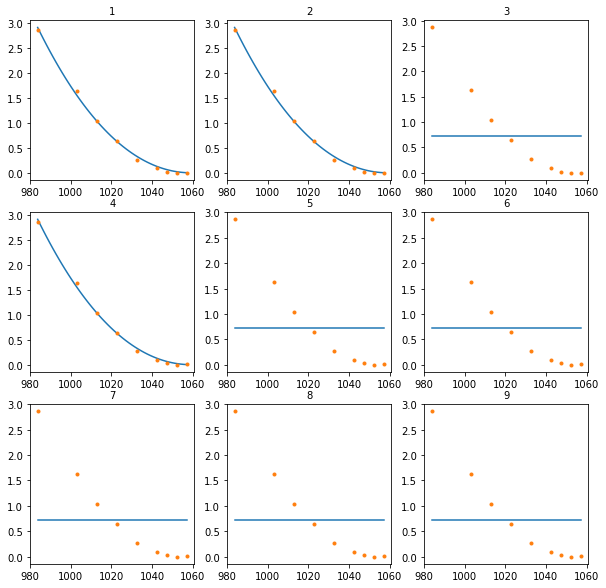

In [279]:
data=pd.read_table("Data/Rechts.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)+2
xmin=29
intens=intens[xmin:temp]
intens=np.max(intens)/intens

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
#ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-5,2,3)
Ef=Eg
counter=0
xcounter=-1
ycounter=0
xaxis=np.linspace(min(wavelen),max(wavelen))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,wavelen,intens,p0=(x,y,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt)
            print(x,y)
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(wavelen,intens,".")
            ax[xcounter,ycounter].set_title(counter)
            ycounter=ycounter+1
        except RuntimeError:
            print("nothing")

9 : [  0.79981355   0.37073031 360.31101573] mit p0: 2.0 , 2.0
[9.57768632e-04 9.57768625e-04 1.91642782e+01]


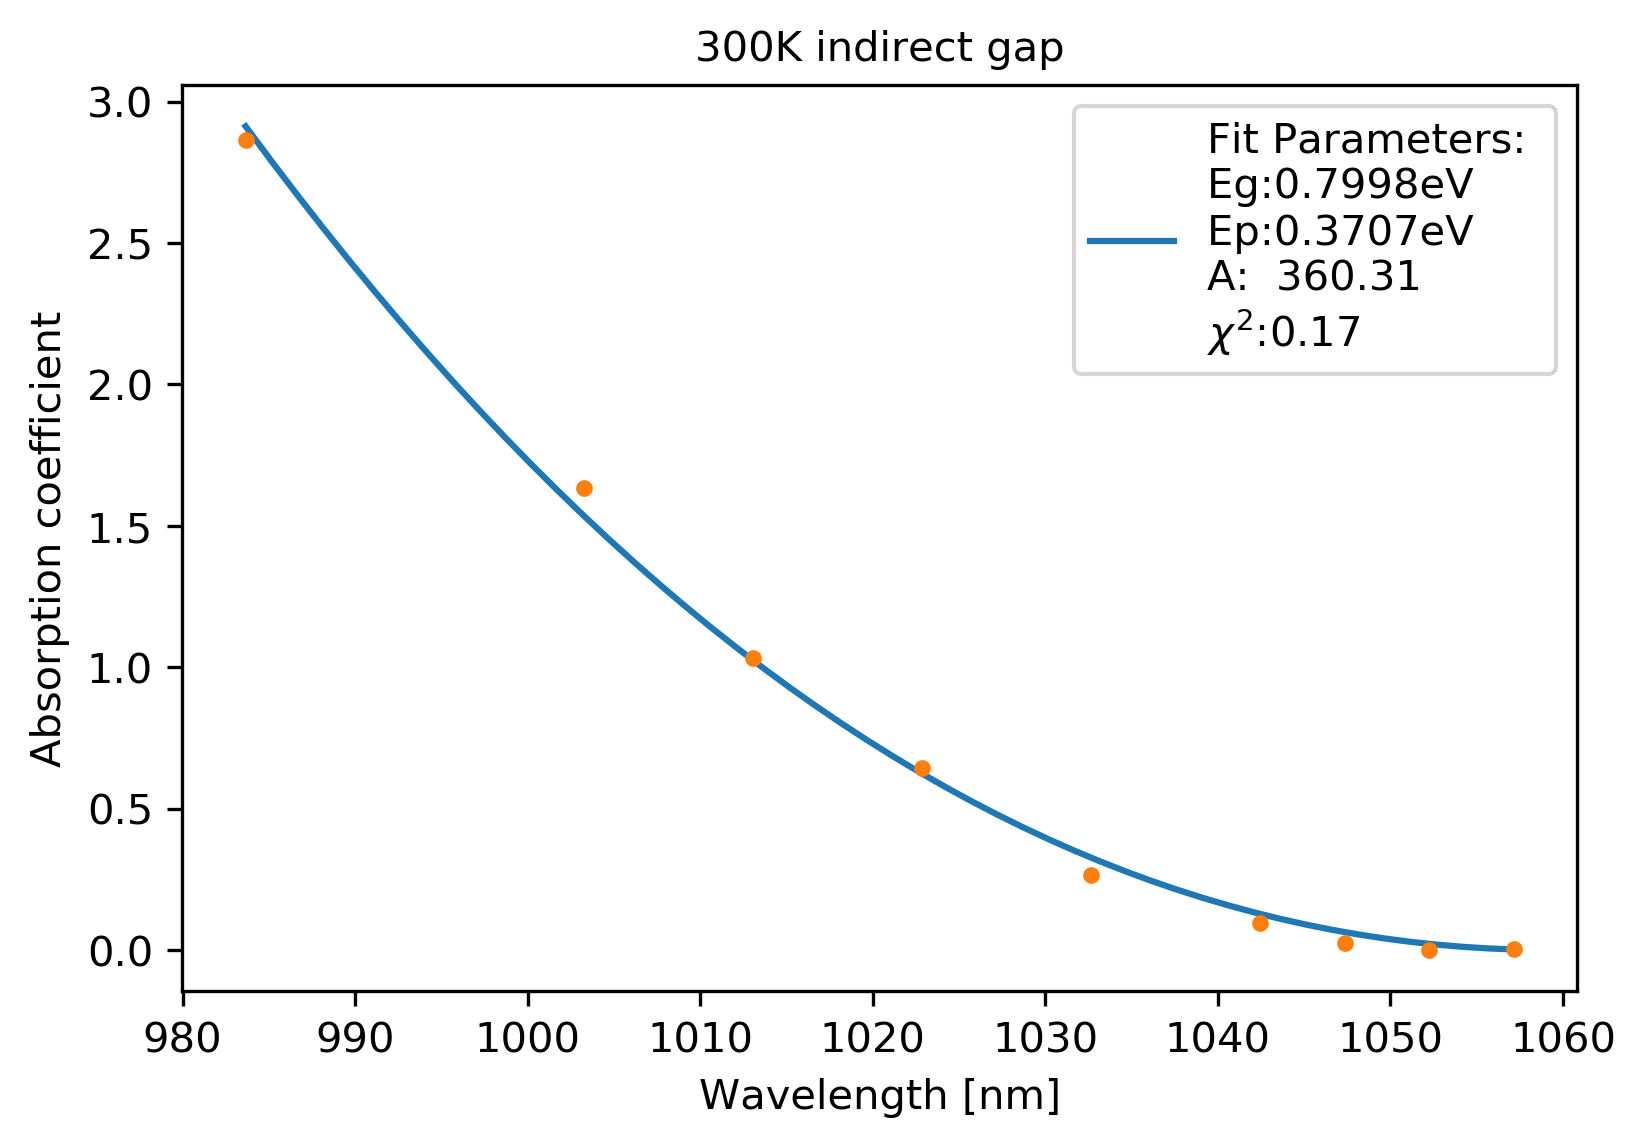

In [280]:
fig,ax=plt.subplots(dpi=300)     
popt,pcov=curce_fit(indFit,wavelen,intens,p0=(1.000005 ,1e-05,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
#if(popt[0]>popt[1]):
print(counter,":",popt, "mit p0:",x,",",y)
chisq=chisquared(indFit,wavelen,intens,popt)
ax.plot(xaxis,indFit(xaxis,*popt),label="Fit Parameters: \nEg:{:.4f}eV \nEp:{:.4f}eV \nA:  {:.2f}".format(float(popt[0]),float(popt[1]),float(popt[2]))+"\n"+r"$\chi^2$:{:.2f}".format(chisq))
ax.plot(wavelen,intens,".")
ax.set_title("300K indirect gap")
ax.legend()
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorption coefficient")
fig.savefig("Plots/300k indirect gap")
perr = np.sqrt(np.diag(pcov))
print(perr)

In [281]:
def indFit(wl,Eg,Ep,A,T=77):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

1 : [  0.81841624   0.37787528 339.5690862 ] mit p0: 1e-05 , 1e-05
2 : [  0.38095008   0.81534144 339.56907799] mit p0: 1e-05 , 1.000005
3 : [1.41587968e+04 1.41612069e+04 8.36254597e-10] mit p0: 1e-05 , 2.0
4 : [  0.38093822   0.8153533  339.569078  ] mit p0: 1.000005 , 1e-05
5 : [9.57686033e+03 9.57208663e+03 1.82894335e-09] mit p0: 1.000005 , 1.000005
6 : [1.38387324e+04 1.38368787e+04 8.75648270e-10] mit p0: 1.000005 , 2.0
7 : [1.40421358e+04 1.40438623e+04 8.50225720e-10] mit p0: 2.0 , 1e-05
8 : [1.33855211e+04 1.33827553e+04 9.36095640e-10] mit p0: 2.0 , 1.000005
9 : [1.11904820e+04 1.11954178e+04 1.33849981e-09] mit p0: 2.0 , 2.0


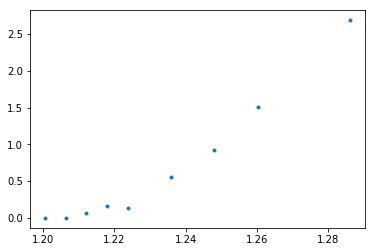

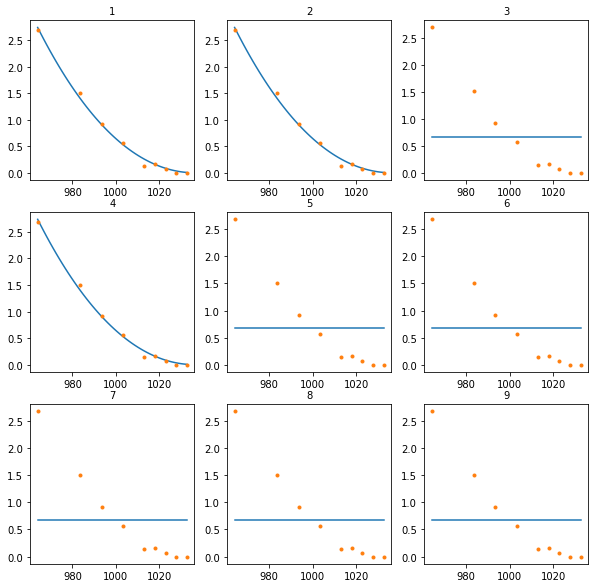

In [284]:
data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)
xmin=28
intens=intens[xmin:temp]
intens=np.max(intens)/intens

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
#ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-5,2,3)
Ef=Eg
counter=0
xcounter=-1
ycounter=0
xaxis=np.linspace(min(wavelen),max(wavelen))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,wavelen,intens,p0=(x,y,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt, "mit p0:",x,",",y)
            
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(wavelen,intens,".")
            ax[xcounter,ycounter].set_title(counter)
            ycounter=ycounter+1
        except RuntimeError:
            print("nothing")



[1.25514158e-03 1.25514149e-03 2.38066445e+01]


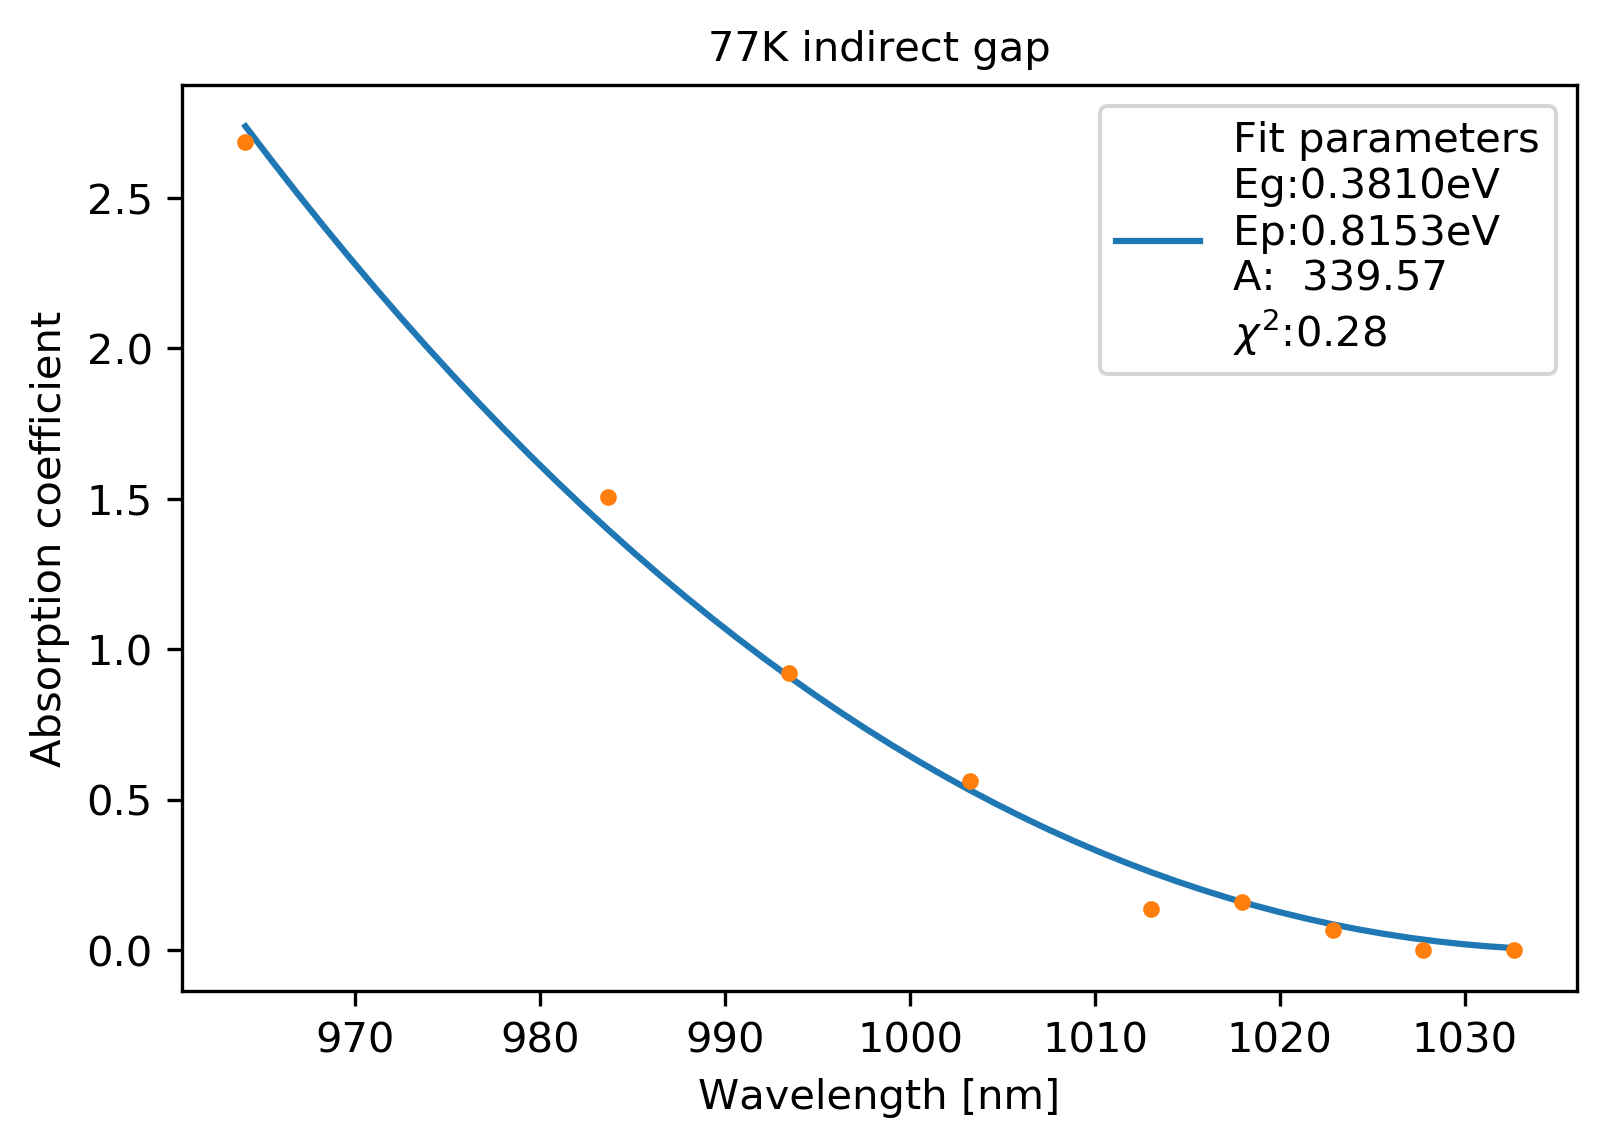

In [285]:
fig,ax=plt.subplots(dpi=300)     
popt,pcov=curce_fit(indFit,wavelen,intens,p0=(1e-05 , 1.000005,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
#if(popt[0]>popt[1]):
#print(counter,":",popt, "mit p0:",x,",",y)
perr = np.sqrt(np.diag(pcov))
print(perr)
chisq=(chisquared(indFit,wavelen,intens,popt))
ax.plot(xaxis,indFit(xaxis,*popt),label="Fit parameters\nEg:{:.4f}eV \nEp:{:.4f}eV \nA:  {:.2f} ".format(float(popt[0]),float(popt[1]),float(popt[2]))+"\n"+r"$\chi^2$:{:.2f}".format(chisq))
ax.plot(wavelen,intens,".")
ax.set_title("77K indirect gap")
ax.legend()
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorption coefficient")
fig.savefig("Plots/77K indirect gap")
